### 주택 가격 예측 (House Price Regression)

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# 경고문 미표시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터프레임 표시 제한 설정
pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

### 데이터 불러오기

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- 데이터 상위 행 살펴보기

In [3]:
data = housing['frame']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# OverallQual, GrLivArea, GarageCars 변수 선택
features = ['OverallQual', 'GrLivArea', 'GarageCars']
target = 'SalePrice'

X = data[features]
y = data[target]

In [5]:
# Train - Test 분할 (Hold-out Validation)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(1168, 3) (1168,)
(292, 3) (292,)


### 과대 적합

In [6]:
# data에서 수치형 변수만 선택
X = data.select_dtypes(include=['number'])
X = X.drop(['Id', 'SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,...,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,...,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,...,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,...,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,...,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [7]:
X.shape # 36개의 변수

(1460, 36)

In [8]:
# 결측치 확인
X.isnull().sum().sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MSSubClass       0
OverallQual      0
              ... 
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
Length: 36, dtype: int64

In [9]:
# 결측치 처리
X = X.fillna(X.mean()) # 평균값으로 결측치 대체
X.isnull().sum().sort_values(ascending=False)

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
              ..
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
Length: 36, dtype: int64

In [10]:
X.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,...,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,...,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007


In [11]:
y.head(2)

0    208500
1    181500
Name: SalePrice, dtype: int64

In [12]:
# 데이터 저장
X.to_csv('X_housing.csv', index=False)
y.to_csv('y_housing.csv', index=False)

In [13]:
# normalize=True : 각 데이터 값의 비율을 반환
X_tr['OverallQual'].value_counts(normalize=True)

OverallQual
6     0.266267
5     0.263699
7     0.220890
8     0.115582
4     0.075342
9     0.030822
3     0.013699
10    0.011130
1     0.001712
2     0.000856
Name: proportion, dtype: float64

In [14]:
# stratify : 훈련세트와 검증세트의 각 클래스의 비율이 동일하게 설정한다.
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=X['OverallQual'], random_state=42)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)

LinearRegression()

In [15]:
# stratify를 설정하여 훈련세트 (X_tr)과 검증세트 (X_val)의 'OverallQual' 열의 각 클래스 비율이 동일하게 분포된 모습
X_tr['OverallQual'].value_counts(normalize=True)

OverallQual
5     0.272260
6     0.255993
7     0.218322
8     0.115582
4     0.079623
9     0.029110
3     0.013699
10    0.011986
2     0.001712
1     0.001712
Name: proportion, dtype: float64

In [16]:
X_val['OverallQual'].value_counts(normalize=True)

OverallQual
5     0.270548
6     0.256849
7     0.219178
8     0.113014
4     0.078767
9     0.030822
3     0.013699
10    0.013699
2     0.003425
Name: proportion, dtype: float64

In [17]:
# 성능 평가 (R^2 결정계수)
print(f"훈련 셋: {lr_model.score(X_tr, y_tr)}")
print(f"검증 셋: {lr_model.score(X_val, y_val)}")

훈련 셋: 0.8332147127887786
검증 셋: 0.7286516939640512


In [18]:
# 성능 평가 (MSE)
from sklearn.metrics import mean_squared_error
print(f"훈련 셋: {mean_squared_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_squared_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 958023589.6498252
검증 셋: 2319851379.3040514


In [19]:
# 성능 평가 (MAE)
from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_absolute_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 20394.51250042741
검증 셋: 25414.419053670004


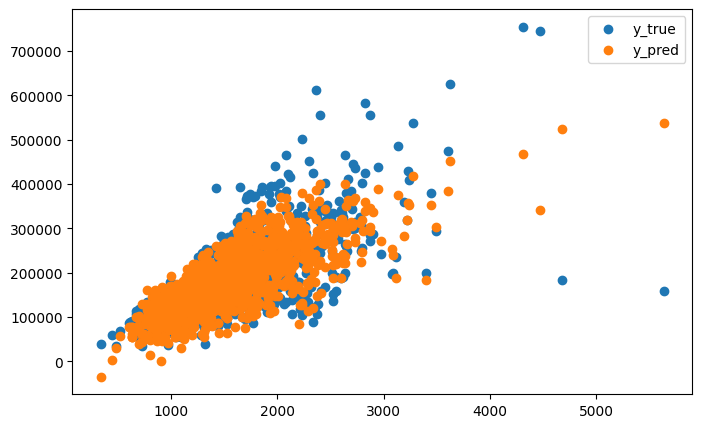

In [20]:
# 실제값과 예측값의 분포 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X['GrLivArea'], y, label='y_true')  
plt.scatter(X['GrLivArea'], lr_model.predict(X), label='y_pred')
plt.legend()
plt.show()

### Bias & Variance

- 편향 (Bias) : 모델이 데이터의 패턴을 충분히 학습하지 못할 때 발생하는 오류
- 분산 (Variance) : 모델이 데이터의 노이즈까지 학습하여 훈련 데이터에는 매우 잘 맞지만, 새로운 데이터 (테스트 데이터)에서는 성능이 떨어질 때 발생하는 오류

- 모델의 편향이 크다. → 학습 데이터와 테스트 데이터 모두 성능이 낮다.
- 모델의 분산이 크다. → 과대적합 상태라 학습 데이터에서는 성능이 매우 좋으나, 테스트 데이터에서는 성능이 낮다.

### 규제 (Regularization)

- 규제는 손실 함수 (Loss Function) 에 패널티를 부여하여 모델이 과적합되지 않도록 가중치를 줄이는 역할을 한다.

- 모델은 손실 함수 (Ex. MSE) 를 최소화하려고 하기 때문에 규제항의 가중치를 줄이려고 한다.

### L2 규제 - Ridge 모델

- L2 규제 (Ridge) 는 가중치의 제곱합에 패널티를 부과하고 결과적으로 모든 가중치가 0에 가까워지도록 조정된다.

- 변수간 상관관계가 높은 경우인 다중공선성 문제가 있을 때, 모든 변수가 모델에 기여하도록 하고 싶을 때 적합하다.

In [21]:
from sklearn.linear_model import Ridge
ridge_models = []
for alpha in [0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)
    ridge_models.append(ridge)
    print(f"alpha: {alpha}")
    print(f"훈련 셋: {ridge.score(X_tr, y_tr)}")
    print(f"검증 셋: {ridge.score(X_val, y_val)}")
    print()

alpha: 0.1
훈련 셋: 0.8332147031752475
검증 셋: 0.7286503844725287

alpha: 1
훈련 셋: 0.8332137854566292
검증 셋: 0.728638256739538

alpha: 10
훈련 셋: 0.8331463270882027
검증 셋: 0.7284937721150917

alpha: 100
훈련 셋: 0.8312598749708779
검증 셋: 0.7265245088366992



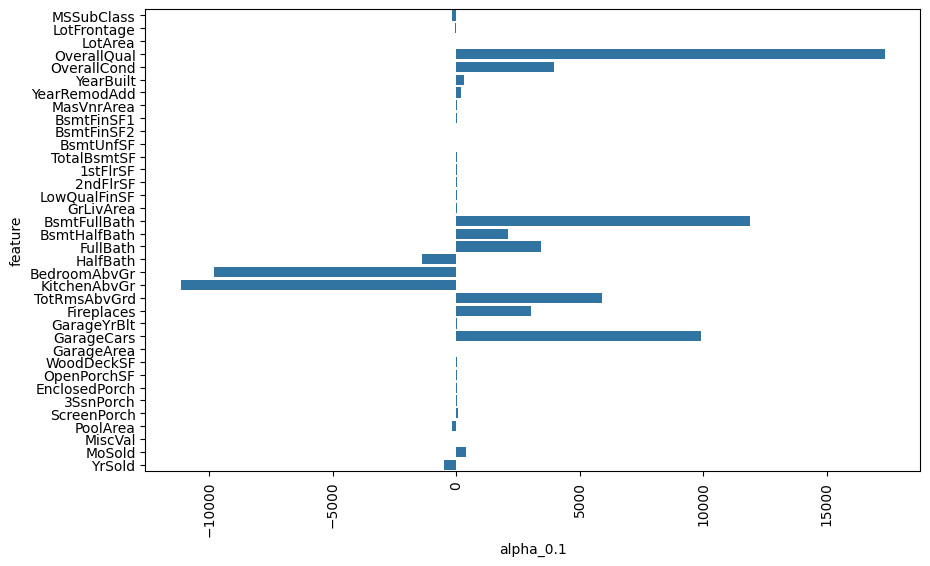

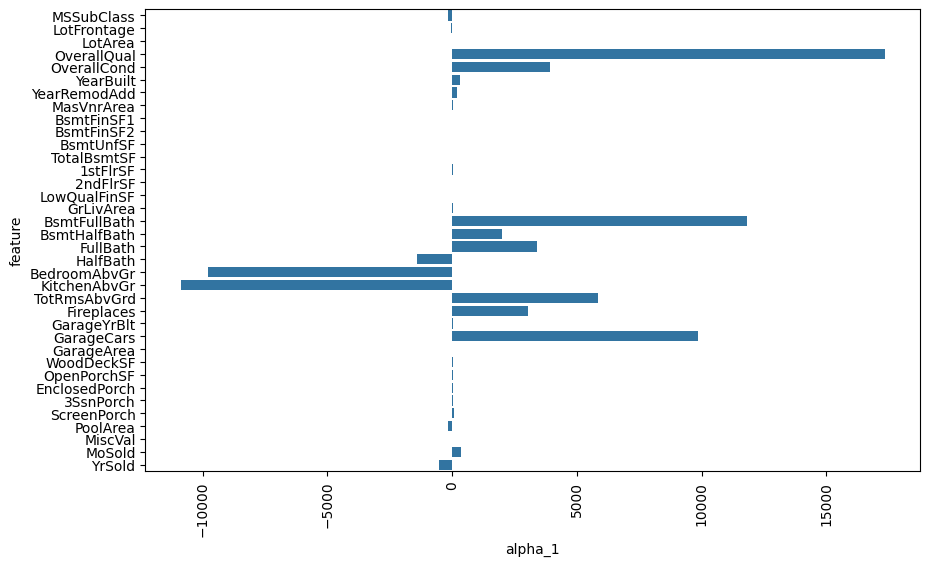

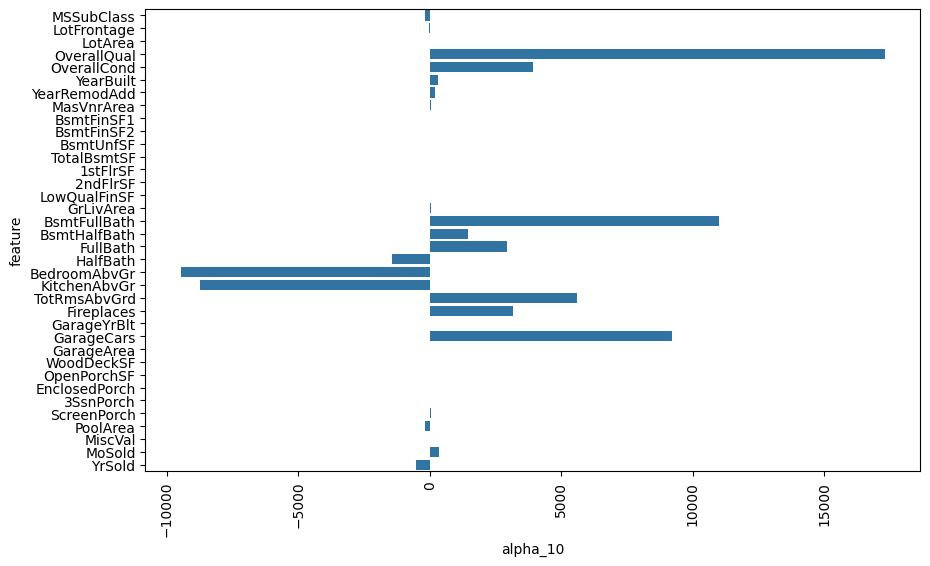

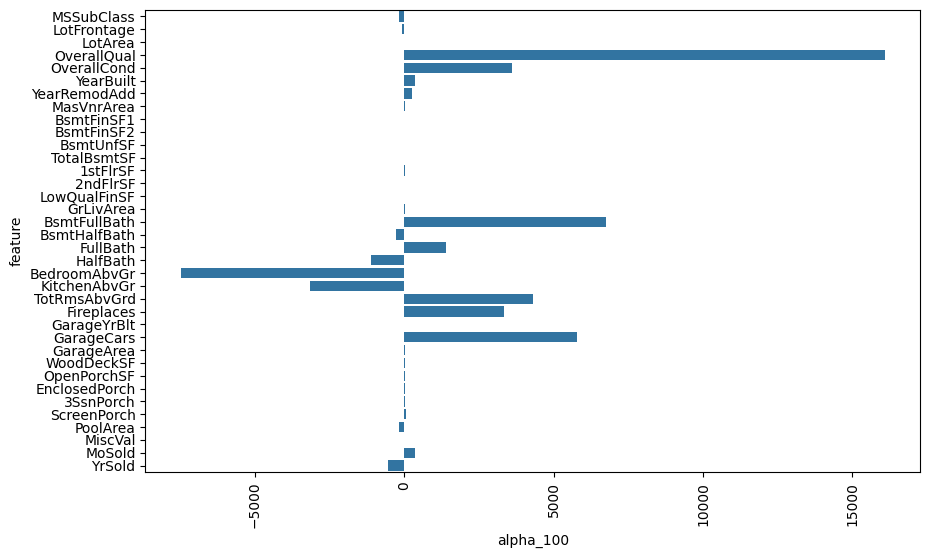

In [22]:
# 계수 확인 - 시각화
coefs = pd.DataFrame()
coefs['feature'] = X.columns
for idx, model in enumerate(ridge_models):
    coefs[f'alpha_{[0.1, 1, 10, 100][idx]}'] = model.coef_

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefs, x=f'alpha_{[0.1, 1, 10, 100][idx]}', y='feature')
    plt.xticks(rotation=90)
    plt.show()

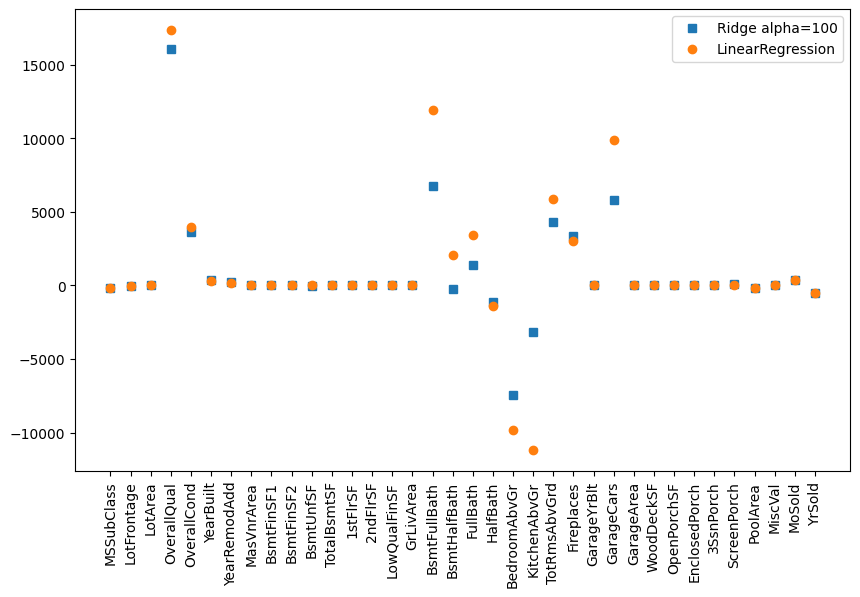

In [23]:
# 계수 확인 - 시각화
plt.figure(figsize=(10, 6))
plt.plot(ridge_models[-1].coef_, 's', label='Ridge alpha=100')
plt.plot(lr_model.coef_, 'o', label='LinearRegression')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.legend()
plt.show()

### L1 규제 - Lasso 모델

- L1 규제 (Lasso) 는 가중치의 절대값 합에 패널티를 부과하고, 결과적으로 중요도가 낮은 가중치는 0이 된다.

- 중요한 변수만 남길 때 적합하다.

In [24]:
from sklearn.linear_model import Lasso
lasso_models = []

for alpha in [0.1, 1, 10, 100]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_tr, y_tr)
    lasso_models.append(lasso)
    print(f"alpha: {alpha}")
    print(f"훈련 셋: {lasso.score(X_tr, y_tr)}")
    print(f"검증 셋: {lasso.score(X_val, y_val)}")
    print()

alpha: 0.1
훈련 셋: 0.8332147126006382
검증 셋: 0.7286513734646463

alpha: 1
훈련 셋: 0.8332146939771459
검증 셋: 0.7286484775341151

alpha: 10
훈련 셋: 0.8332128312817714
검증 셋: 0.7286183907270015

alpha: 100
훈련 셋: 0.8330386596045766
검증 셋: 0.7282036919865273



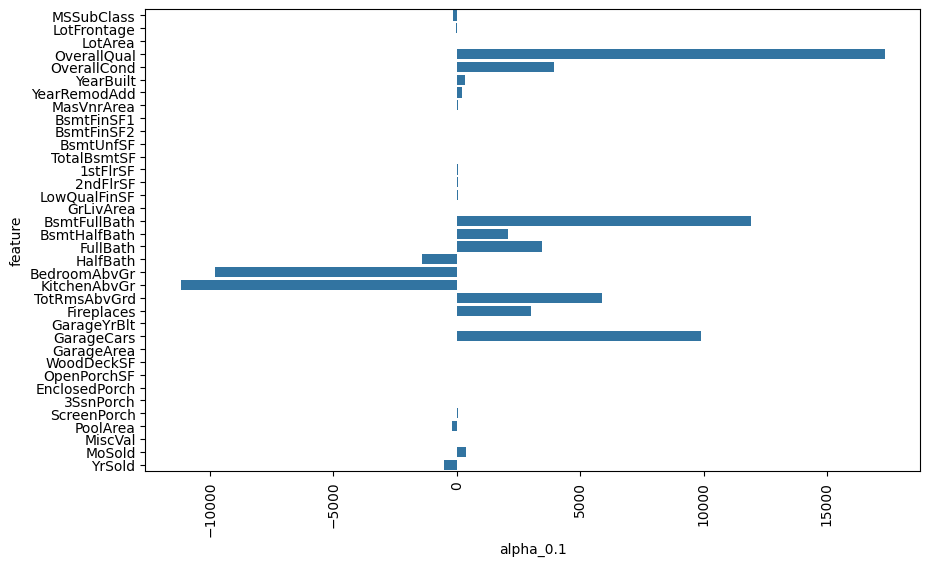

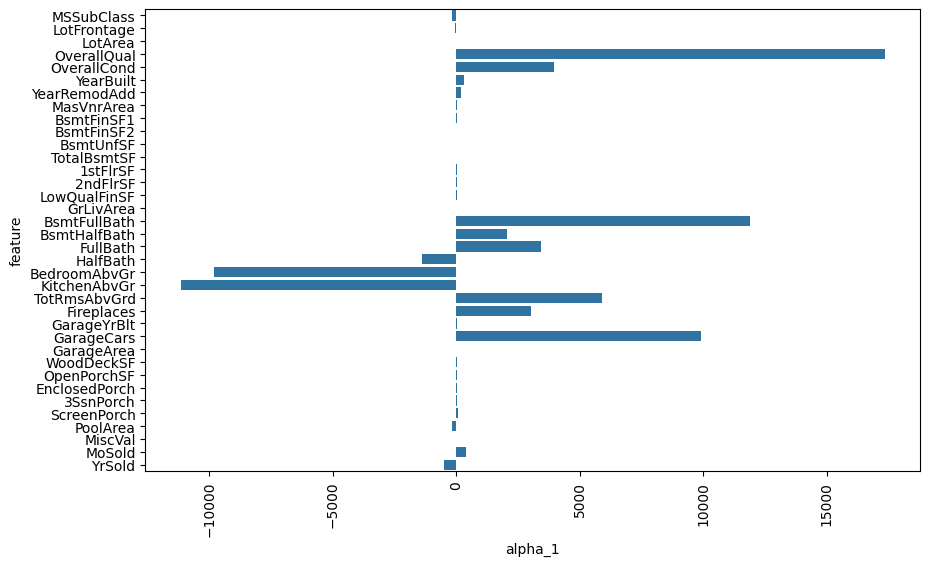

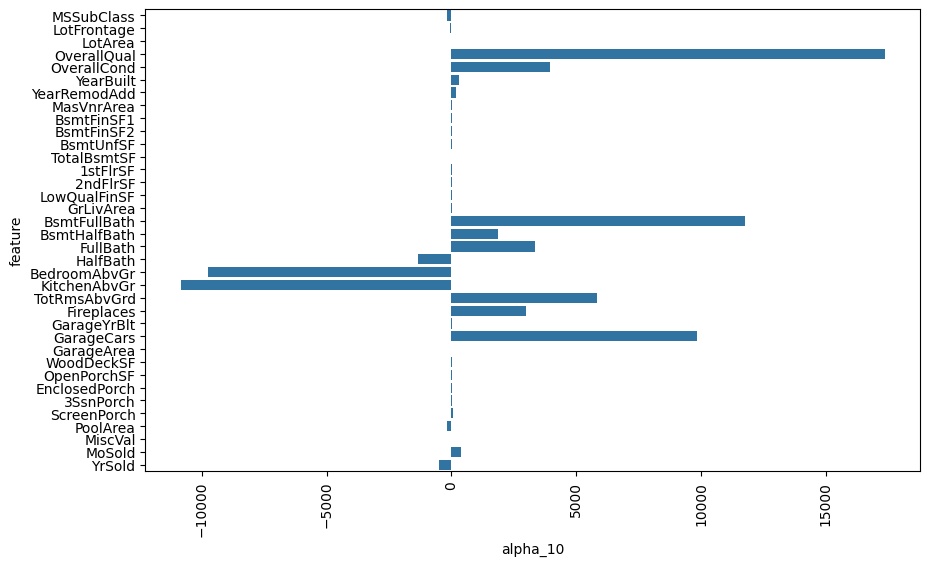

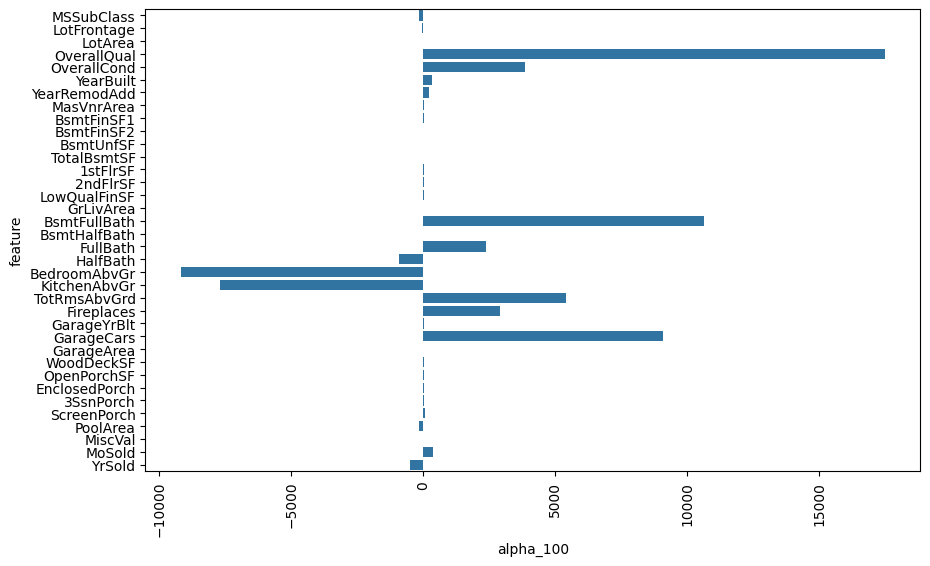

In [25]:
# 계수 확인 - 시각화
coefs = pd.DataFrame()
coefs['feature'] = X.columns
for idx, model in enumerate(lasso_models):
    coefs[f'alpha_{[0.1, 1, 10, 100][idx]}'] = model.coef_

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefs, x=f'alpha_{[0.1, 1, 10, 100][idx]}', y='feature')
    plt.xticks(rotation=90)
    plt.show()

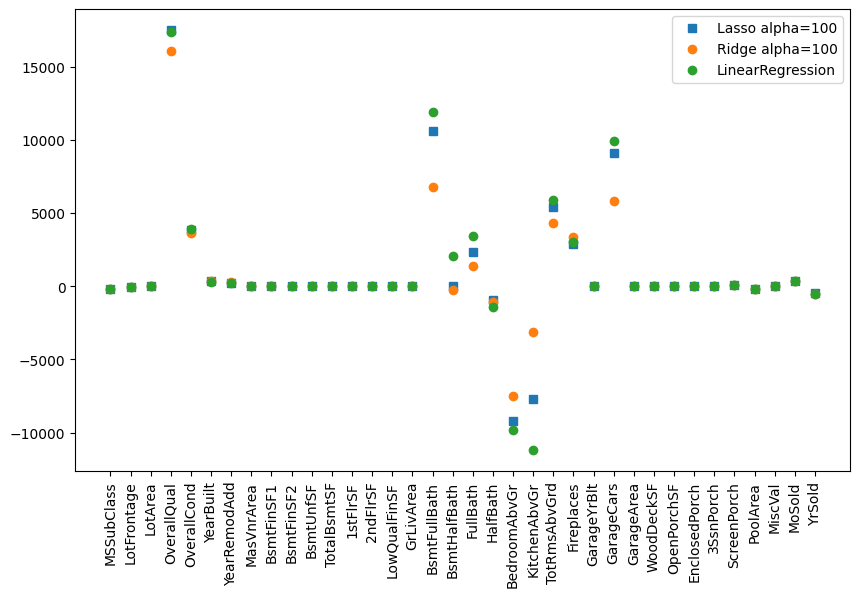

In [26]:
# 계수 확인 - 시각화
plt.figure(figsize=(10, 6))
plt.plot(lasso_models[-1].coef_, 's', label='Lasso alpha=100')
plt.plot(ridge_models[-1].coef_, 'o', label='Ridge alpha=100')
plt.plot(lr_model.coef_, 'o', label='LinearRegression')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.legend()
plt.show()

### L2/L1 규제 - ElasticNet 모델

- ElasticNet 은 L2 규제 (Ridge) 와 L1 규제 (Lasso) 규제를 결합한 모델로, 다중공선성을 해결함과 동시에 중요한 변수를 선택하고자 할 때 적합하다.

In [27]:
from sklearn.linear_model import ElasticNet

elastic_models = []

for alpha in [0.1, 1, 10, 100]:
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5) # l1_ratio : L1 규제의 비율
    elastic.fit(X_tr, y_tr)
    elastic_models.append(elastic)
    print(f"alpha: {alpha}")
    print(f"훈련 셋: {elastic.score(X_tr, y_tr)}")
    print(f"검증 셋: {elastic.score(X_val, y_val)}")
    print()

alpha: 0.1
훈련 셋: 0.8322318749486243
검증 셋: 0.7274909430819281

alpha: 1
훈련 셋: 0.8197050119321388
검증 셋: 0.7154655165361049

alpha: 10
훈련 셋: 0.7853094328401679
검증 셋: 0.6851894225673595

alpha: 100
훈련 셋: 0.7723101470045359
검증 셋: 0.6794912991568024



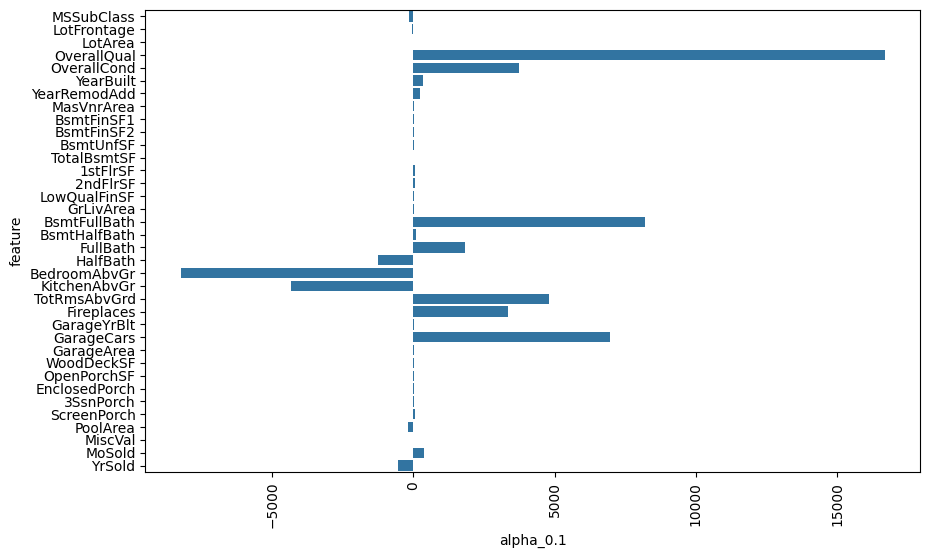

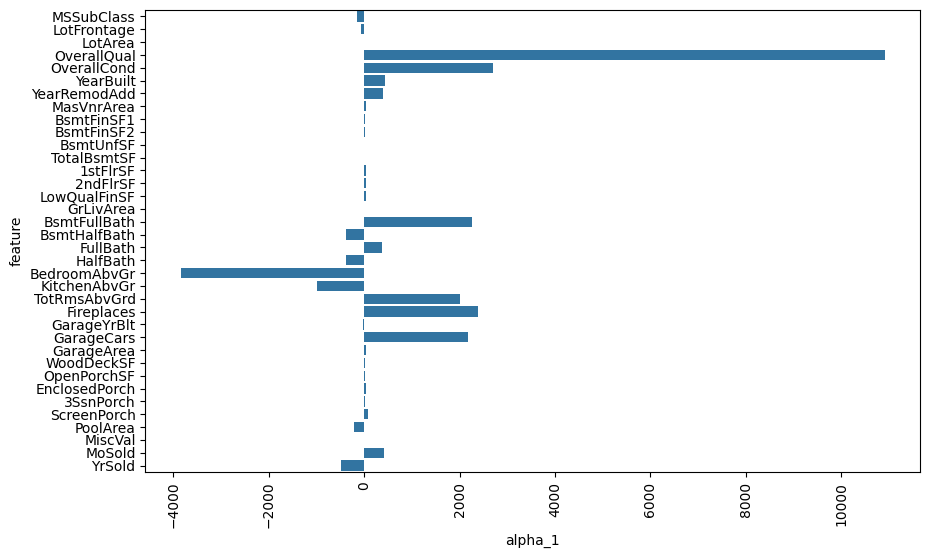

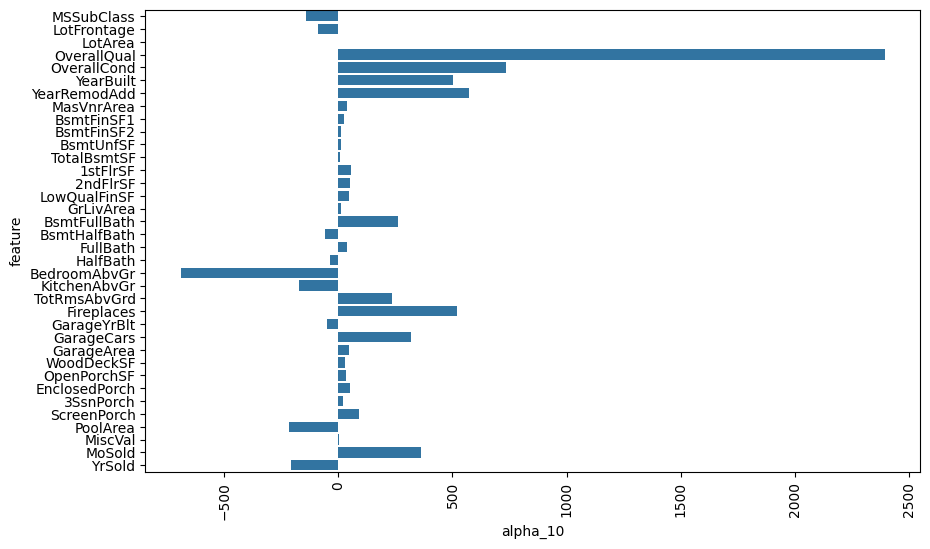

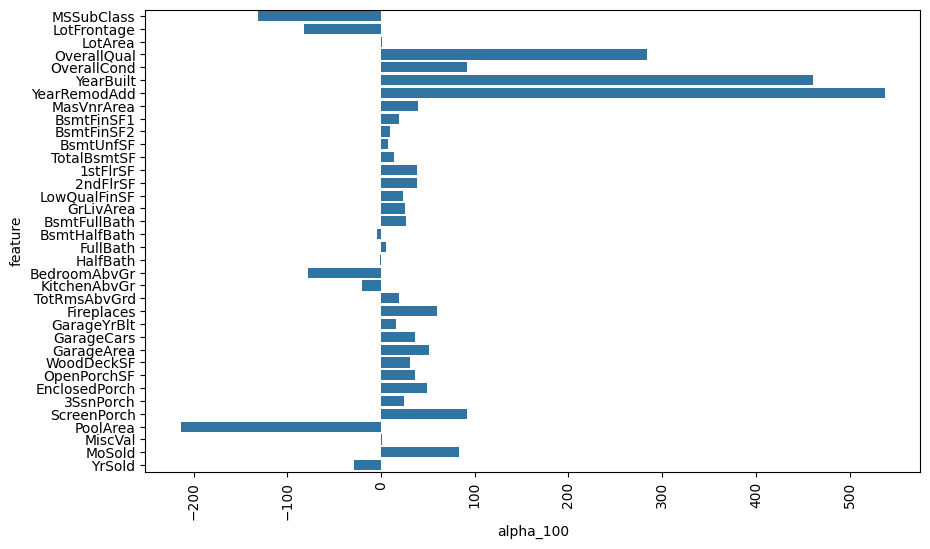

In [28]:
# 계수 확인 - 시각화
coefs = pd.DataFrame()
coefs['feature'] = X.columns

for idx, model in enumerate(elastic_models):
    coefs[f'alpha_{[0.1, 1, 10, 100][idx]}'] = model.coef_

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefs, x=f'alpha_{[0.1, 1, 10, 100][idx]}', y='feature')
    plt.xticks(rotation=90)
    plt.show()

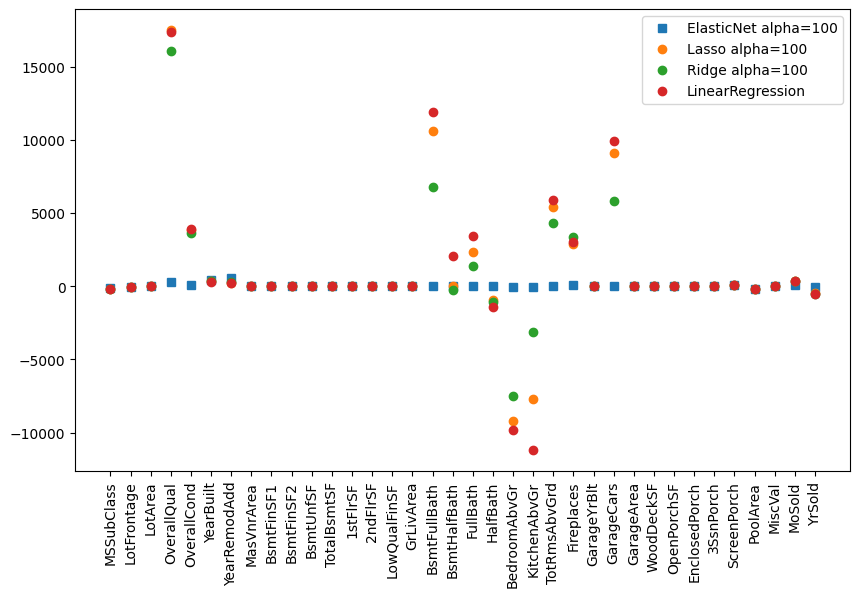

In [29]:
# 계수 확인 - 시각화

plt.figure(figsize=(10, 6))
plt.plot(elastic_models[-1].coef_, 's', label='ElasticNet alpha=100')
plt.plot(lasso_models[-1].coef_, 'o', label='Lasso alpha=100')
plt.plot(ridge_models[-1].coef_, 'o', label='Ridge alpha=100')
plt.plot(lr_model.coef_, 'o', label='LinearRegression')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.legend()
plt.show()